# [Police spending, New Britain Borough and the Central Bucks Regional Police Department](https://bit.ly/2M4sxEa).
### The Bucks County Courier Times used a mix of data from the Pennsylvania Department of Community and Economic Development and 911 data from Bucks County for this story.
### This general data analysis is made possible through several Right to Know Law requests to the Bucks County Department of Emergency Communications and the use of a computer programming language called Python.
### In an effort to show our work, this Jupyter Notebook will walk through some of the steps taken to clean and analyze this data. 

In [46]:
# Python uses different libraries for different tasks.
# Pandas is a very popular library for statistical analysis and handling data in a tabular format
import pandas as pd

In [47]:
#The 911 dispatch data base contains more than 3.7 million calls handled by the 
#Bucks County 911 center; aka "The Radio Room"
#We will use an abridged version of that entire database to show the data here.
calls1=pd.read_csv("abridged_calls.csv")
print(calls1.head())
print(calls1.tail())
#allcalls=pd.read_csv("main_calls_1.csv")

                 towns        date  total_time ems_call
0       falls township  2012-01-01        33.0   Police
1  morrisville borough  2012-01-01         7.0   Police
2  middletown township  2012-01-01         5.0   Police
3    bensalem township  2012-01-01        11.0   Police
4  warminster township  2012-01-01         8.0   Police
                            towns        date  total_time ems_call
3387697       middletown township  2018-10-31         4.0   Police
3387698         bensalem township  2018-10-31        65.0   Police
3387699       middletown township  2018-10-31        19.0   Police
3387700  upper makefield township  2018-10-31        10.0   Police
3387701         bensalem township  2018-10-31        11.0   Police


### The 911 database is not a complete account of everything police departments handle throughout any given day, but it does include a little more information than what might be typically considered an "emergency call."
### This analysis was looking specifically at police spending in Chalfont, Doylestown and New Britain boroughs, so we focused primarily on call volume.

In [48]:
#matplotlib is a good library to plot basic charts.
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

doylestown borough     61942
chalfont borough       16042
new britain borough    13256
Name: towns, dtype: int64


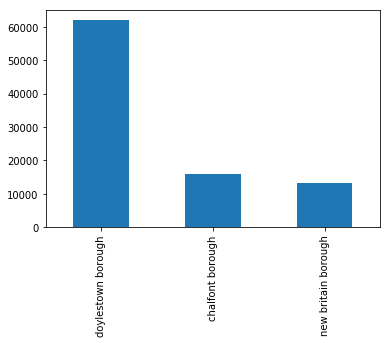

In [49]:
towns1=['doylestown borough','new britain borough','chalfont borough']
print(calls1[calls1.towns.isin(towns1)].towns.value_counts())
calls1[calls1.towns.isin(towns1)].towns.value_counts().plot(kind='bar')

### In total, we can see that more nearly 62,000 calls were logged in Doylestown Borough, while 13,256 were logged in New Britain Borough.
### That's a total of all calls between 2012 and most of 2018. We used the date column to assign the year column to further break the data into more managable chunks. 

# DCED 5-year Estimates
### Estimating police spending was a little more complicated. The story is focused on these three communities, but rising police costs are not something only affecting these specific towns. Going through every municipality's budget documents wasn't feasible, but there was some potentially useful information on the DCED's [Municipal Statistics website](http://munstats.pa.gov/public/) that helped fill in these gaps.
### A financial data section includes Excel spreadsheets of statewide municipal financial data as recent as 2017 and as far back as 2006.

In [63]:
finance17=pd.read_csv('finance_17.csv')
finance06=pd.read_csv('finance_06.csv')

In [64]:
finance06[["Municipality Name",'County Name','Reporting Year','Police Expenditures','Total Revenues']].head()

,Municipality Name,County Name,Reporting Year,Police Expenditures,Total Revenues
0,ABBOTTSTOWN BORO,ADAMS,2006,88890,211355
1,ARENDTSVILLE BORO,ADAMS,2006,0,835138
2,BENDERSVILLE BORO,ADAMS,2006,16271,300440
3,BERWICK TWP,ADAMS,2006,212410,1339515
4,BIGLERVILLE BORO,ADAMS,2006,108897,947183


In [65]:
finance17[["Municipality Name",'County Name','Reporting Year','Police Expenditures','Total Revenues']].head()

,Municipality Name,County Name,Reporting Year,Police Expenditures,Total Revenues
0,ABBOTTSTOWN BORO,ADAMS,2017,0,313496
1,ARENDTSVILLE BORO,ADAMS,2017,0,562004
2,BENDERSVILLE BORO,ADAMS,2017,32220,200688
3,BERWICK TWP,ADAMS,2017,0,1123380
4,BIGLERVILLE BORO,ADAMS,2017,146449,1363588


### The next steps basically consist of finding the average totals for each municipality over a five year span, then creating a new dataframe that consisted only of the 5-year averages (which now ran between 2010 and 2017).
### Combining those average totals for revenues, total calls, total calls times and even 5-year population estimates from the U.S. Census, a full Bucks County police spending dataframe was created.

In [66]:
analyis_file=pd.read_csv("Analyis_File_July_15.csv")

In [67]:
analyis_file.head()

,total_calls,town_year,total_time,muni,year,A_PS,pop_est,t_rev,t_tax,r_tax
0,50178.0,bensalem township 2012,1689087.0,bensalem township,2012,22026390.6,60451,49775602.2,16245474.2,11548500.8
1,46027.0,bristol township 2012,1373679.0,bristol township,2012,12415615.2,54691,41613200.0,20832388.2,13253509.6
2,31756.0,middletown township 2012,872945.0,middletown township,2012,9097715.0,45477,34042635.6,13223590.0,8806927.8
3,25584.0,falls township 2012,985940.0,falls township,2012,9187103.6,34367,30925622.2,3219740.6,2299377.2
4,24790.0,warminster township 2012,663852.0,warminster township,2012,7021603.4,32691,23371518.0,10661879.2,4808437.0


### From these various data sources, we could now perform a broad analysis on average police spending and calls dispatched in the Central Bucks Regional Police Department coverage area and Bucks County at large.

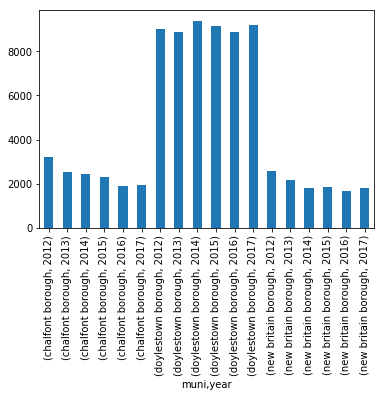

In [68]:
analyis_file[(analyis_file.muni.isin(towns1))&(analyis_file.year>2011)].groupby(['muni','year']).total_calls.sum().plot(kind='bar')

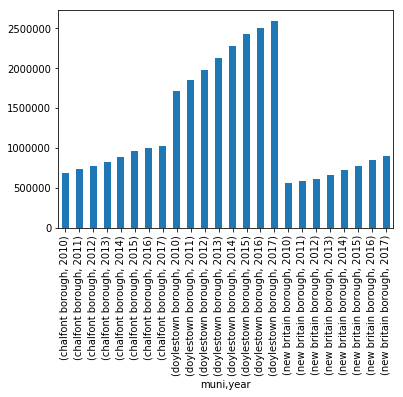

In [69]:
analyis_file[analyis_file.muni.isin(towns1)].groupby(['muni','year']).A_PS.sum().plot(kind='bar')